In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
print('Done')

Done


In [3]:
# Read CSVs into memory.
M = pd.read_csv('../data/members.csv')
S = pd.read_csv('../data/songs.csv')
E = pd.read_csv('../data/song_extra_info.csv')
TRN = pd.read_csv('../data/train.csv')
TST = pd.read_csv('../data/test.csv')

# Set song_id index.
S = S.set_index(['song_id'], drop=False)
E = E.set_index(['song_id'], drop=False)

print('Done')

Done


In [4]:
print(M.shape)
print(set(M['city'].values))
M.head()

(34403, 7)
{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
print(S.shape)
print(S['language'].max())
S.head()

(2296320, 7)
59.0


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
song_id,,,,,,,
CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
print(E.shape)
E.head()

(2295971, 3)


,song_id,name,isrc
song_id,,,
LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
print(TRN.shape)
print(TRN['target'].mean(), TRN['target'].sum())
TRN.head()

(7377418, 6)
0.503517084161 3714656


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
print(TST.shape)
TST.head()

(2556790, 6)


,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


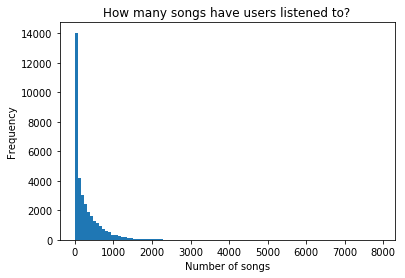

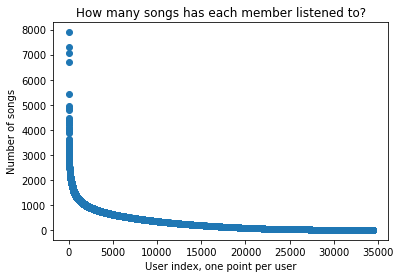

In [14]:
# How many songs have members listened to?
cnts = TRN['msno'].append(TST['msno']).value_counts()
plt.title('How many songs have users listened to?')
plt.hist(cnts, bins=100)
plt.ylabel('Frequency')
plt.xlabel('Number of songs')
plt.show()

# How many songs has each member listened to?
plt.title('How many songs has each member listened to?')
plt.scatter(np.arange(len(cnts)), cnts)
plt.ylabel('Number of songs')
plt.xlabel('User index, one point per user')
plt.show()

# print('mean', np.mean(cnts))
# print('median', np.median(cnts))
# print('min/max', np.min(cnts), np.max(cnts))

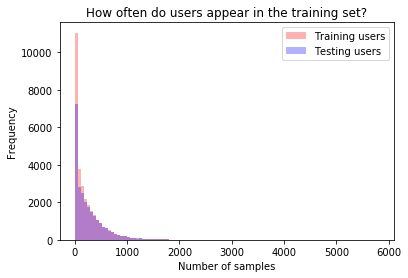

In [39]:
plt.title('How often do users appear in the training set?')
ctrn = Counter(TRN['msno'])
y = sorted([ctrn[m] for m in TRN['msno'].unique()], reverse=True)
plt.hist(y, color='red', label='Training users', alpha=0.3, bins=100)
y = sorted([ctrn[m] for m in TST['msno'].unique()], reverse=True)
plt.hist(y, color='blue', label='Testing users', alpha=0.3, bins=100)
plt.ylabel('Frequency')
plt.xlabel('Number of samples')
plt.legend()
plt.show()

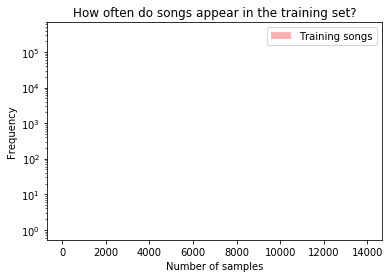

In [48]:
plt.title('How often do songs appear in the training set?')
ctrn = Counter(TRN['song_id'])
y = sorted([ctrn[m] for m in TRN['song_id'].unique()], reverse=True)
plt.hist(y, color='red', label='Training songs', alpha=0.3, bins=20)
y = sorted([ctrn[m] for m in TST['song_id'].unique()], reverse=True)
plt.hist(y, color='blue', label='Testing songs', alpha=0.3, bins=20)
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Number of samples')
plt.legend()
plt.show()

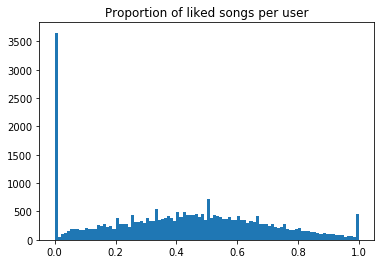

In [112]:
# User like averages -- what proportion of songs listened has each user liked?
listen_cnts = TRN['msno'].value_counts()
like_cnts = TRN[TRN['target'] == 1]['msno'].value_counts()
like_prop = [0] * (len(listen_cnts) - len(like_cnts))
like_prop += [like_cnts[msno] / listen_cnts[msno] for msno in like_cnts.index]
plt.title('Proportion of liked songs per user')
plt.hist(like_prop, bins=100)
plt.show()

In [39]:
# How many songs exist in test set, not in training set?
# Missing songs complicate collaborative filtering approaches but might be 
# resolvable by considering higher level features like genre and artist.
diff = set(TST['song_id']) - set(TRN['song_id'])
a = len(diff)
b = len(set(TST['song_id']))
print('TST new songs', a, b, '%.3lf' % (a/b))

songs 59873 224753 0.266


In [67]:
# How many of the songs exist in the test and training set?
# This matters for scraping.
total = set(TST['song_id']).union(set(TRN['song_id']))
print(len(total))

419839


In [53]:
# Do any songs exist in the train and test sets but not the songs table?
print('TRN missing songs', len(set(TRN['song_id']) - set(S['song_id'])))
print('TST missing songs', len(set(TST['song_id']) - set(S['song_id'])))

TRN missing songs 52
TST missing songs 14


In [54]:
# Do any users exist in the train and test sets but not the songs table?
print('TRN missing users', len(set(TRN['msno']) - set(M['msno'])))
print('TST missing users', len(set(TST['msno']) - set(M['msno'])))

TRN missing users 0
TST missing users 0


In [35]:
# How many users exist in test set, not in training set?
# This complicates some approaches which require a history of interactions with the content.
diff = set(TST['msno']) - set(TRN['msno'])
a = len(diff)
b = len(set(TST['msno']))
print('TST new users', a, b, '%.3lf' % (a/b))

3648 25131 0.145


In [64]:
# Heatmap of song country vs. song language. Country based on ISRC code.
# https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements
ccs = sorted(set([str(x)[:2] for x in E['isrc'].values]))
lgs = sorted(set(S['language'].values))
cc2idx = {x:i for i,x in enumerate(ccs)}
lg2idx = {x:i for i,x in enumerate(lgs)}
freq = np.zeros((len(ccs), len(lgs)))
J = S[['language']].join(E[['isrc']])
for i,r in J.iterrows():
    cci = cc2idx[str(r['isrc'])[:2]]
    lgi = lg2idx[r['language']]
    freq[cci,lgi] += 1
    if np.sum(freq) > 100000: break
print(np.sum(freq))

100001.0


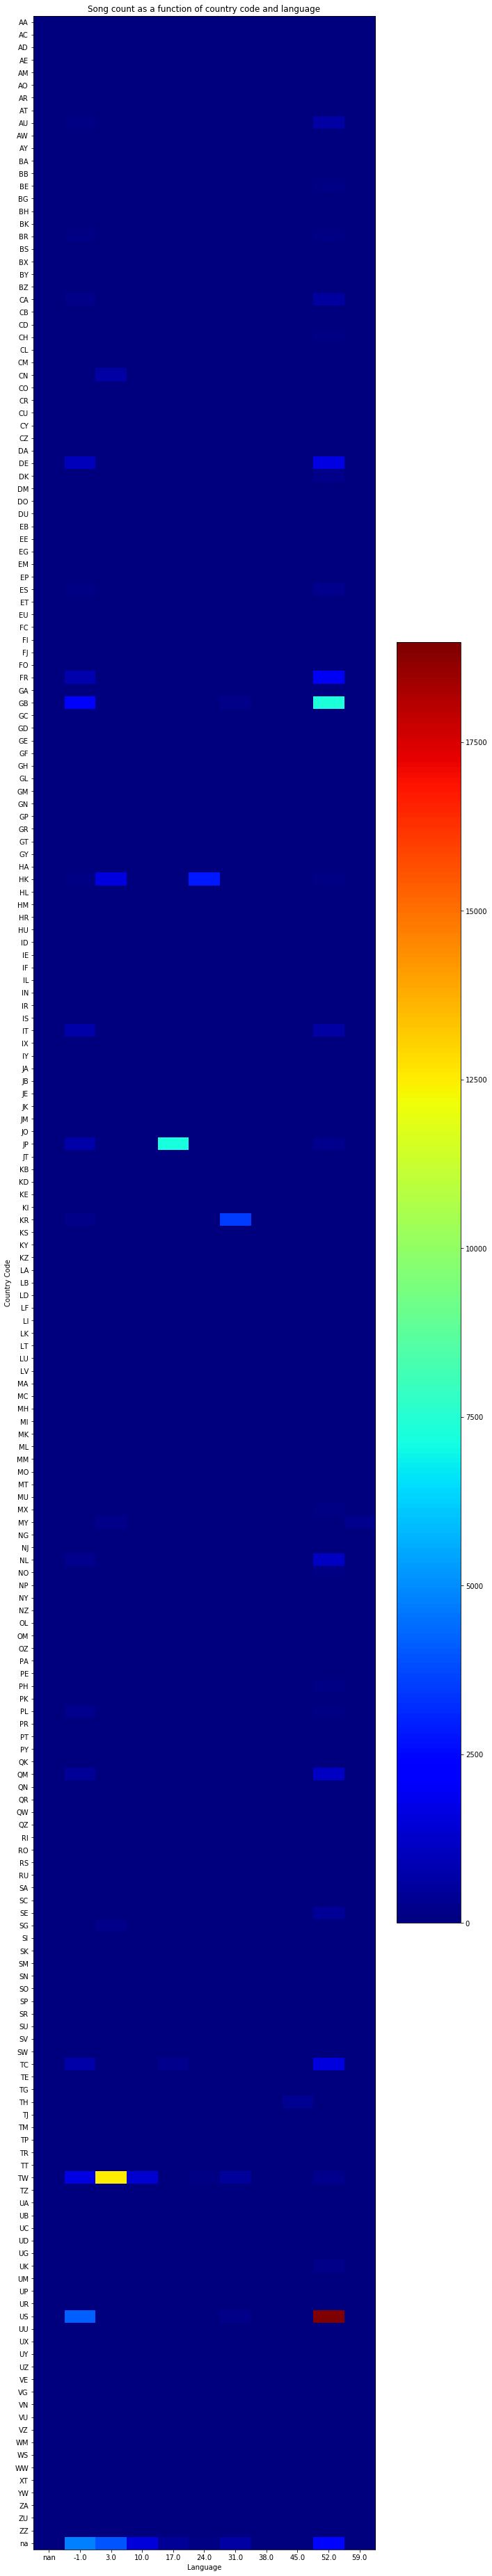

In [66]:
plt.figure(figsize=(len(lgs),len(ccs)//3))
plt.imshow(freq, interpolation='none', aspect='auto')
plt.title('Song count as a function of country code and song language')
plt.ylabel('Country Code')
plt.xlabel('Language')
plt.yticks(range(len(ccs)), ccs)
plt.xticks(range(len(lgs)), lgs)
plt.colorbar()
plt.show()